# Exploring data for the attention index

The idea of the attention index is to provide a score that indicates the impact of an article, and can easily be aggregated by subject, publisher or other axis.

The index comprises of two parts:

- **promotion** how important the article was to the publisher, based on the extent to which they chose to editorially promote it
- **response** how readers reacted to the article, based on social engagements

The index will be a number between 0 and 100. 50% is driven by the promotion, and 50% by response:

![Attention Index](../images/kaleida-attention-index-data-factors-chart.png)

### Promotion Score

The promotion score should take into account:

- whether the publisher chose make the article a lead article on their primary front (30%)
- how long the publisher chose to retain the article on their front (40%)
- whether they chose to push the article on their facebook brand page (30%)

It should be scaled based on the value of that promotion, so a popular, well-visited site should score higher than one on the fringes. And similarly a powerful, well-followed brand page should score higher than one less followed.

### Response Score

The response score takes into account the number of engagements on Facebook. 



The rest of this notebook explores how those numbers could work, starting with the response score because that is easier, I think.

# Setup

In [7]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
data = pd.read_csv("articles_2017-06-01_2017-06-30.csv", index_col="id", \
                   parse_dates=["published", "discovered"])
data.head()

,url,headline,discovered,published,fb_engagements,fb_max_engagements_per_min,fb_max_engagements_per_min_time,fb_comments,fb_reactions,fb_shares,publisher_name,publisher_id,mins_as_lead,mins_on_front,num_articles_on_front,fb_brand_page,fb_brand_page_likes,fb_brand_page_time,alexa_rank
id,,,,,,,,,,,,,,,,,,,
7dff0d3d3e8ae6a4f43d582b294bd03c0a4746f3,http://www.economist.com/news/leaders/21722855...,The British election: The middle has fallen ou...,2017-06-01 09:30:29.938,2017-06-01,25767.00,21.00,2017-06-01T10:58:01.747Z,5827.00,16202.00,3738.00,The Economist,economist_com,6023,10444,44.00,True,8097249.00,2017-06-04T08:19:05.000Z,1825
663d3c01e00503ac647c38e5d3d775cafe7e2ca0,http://www.economist.com/news/indicators/21722...,"Retail sales, producer prices, wages and excha...",2017-06-01 10:40:16.109,2017-06-01,0.00,0.00,2017-06-01T10:54:02.805Z,0.00,0.00,0.00,The Economist,economist_com,0,459,45.00,False,nan,NaN,1825
8bb899dbd63148a4a173882bbbc940492737d0b7,http://www.economist.com/news/indicators/21722...,Foreign reserves,2017-06-01 10:40:16.691,2017-06-01,1.00,0.02,2017-06-01T11:56:02.710Z,0.00,0.00,1.00,The Economist,economist_com,0,349,45.00,False,nan,NaN,1825
e8184c4ea8498103945968fcacd5c3c00f883cba,https://www.nytimes.com/2017/05/31/nyregion/me...,February Thaw at the Flea Market,2017-06-01 00:03:03.133,2017-06-01,217.00,0.90,2017-06-01T03:08:00.900Z,22.00,192.00,3.00,New York Times,nytimes_com,0,0,nan,False,nan,NaN,120
0d8ec825a1f491a0c526859f608ba9b15c7a8ba2,http://www.foxnews.com/politics/2017/05/31/pri...,"Priebus, Conway among White House staffers who...",2017-06-01 00:00:07.065,2017-06-01,2375.00,20.86,2017-06-01T00:14:01.139Z,941.00,1259.00,175.00,Fox News,foxnews_com,0,839,78.00,True,15382550.00,2017-06-01T00:04:36.000Z,285


# Response Score

The response score is a number between 0 and 50 that indicates the level of response to an article.



Perhaps in the future we may choose to include other factors, but for now we just include engagements on Facebook. The maximum score of 50 should be achieved by an article that does really well compared with others.

In [9]:
pd.options.display.float_format = '{:.2f}'.format
data.fb_engagements.describe([0.5, 0.75, 0.9, 0.95, 0.99, 0.995, 0.999])

count    138236.00
mean       1611.24
std       10560.04
min           0.00
50%          33.00
75%         337.00
90%        2342.00
95%        6598.25
99%       30067.65
99.5%     46674.58
99.9%    119804.98
max     1486144.00
Name: fb_engagements, dtype: float64

There's one article there with 1 million plus engagements, let's just double check that.

In [10]:
data[data.fb_engagements > 1000000]

,url,headline,discovered,published,fb_engagements,fb_max_engagements_per_min,fb_max_engagements_per_min_time,fb_comments,fb_reactions,fb_shares,publisher_name,publisher_id,mins_as_lead,mins_on_front,num_articles_on_front,fb_brand_page,fb_brand_page_likes,fb_brand_page_time,alexa_rank
id,,,,,,,,,,,,,,,,,,,
28acc178e3f07c46fcd16c0324e8b0c5ecdccf35,http://www.huffingtonpost.com/entry/i-dont-kno...,I Don't Know How To Explain To You That You Sh...,2017-06-28 03:05:06.097,2017-06-27 01:57:54,1486144.00,1102.03,2017-06-28T14:06:02.064Z,217510.00,1060499.00,208135.00,HuffPost,huffingtonpost_com,0,0,nan,True,9576627.00,2017-06-28T03:00:27.000Z,215


Yup, that's a biggie.

In [11]:
data.fb_engagements.mode()

0   0.00
dtype: float64

Going back to the enagement counts, we see the mean is 1,611, mode is zero, median is 33, 90th percentile is 2,342, 99th percentile is 30,067, 99.5th percentile is 46,674. The standard deviation is 10,560, significantly higher than the mean, so this is not a normal distribution. 

We want to provide a sensible way of allocating this to the 50 buckets we have available. Let's just bucket geometrically first:

ValueError: max must be larger than min in range parameter.

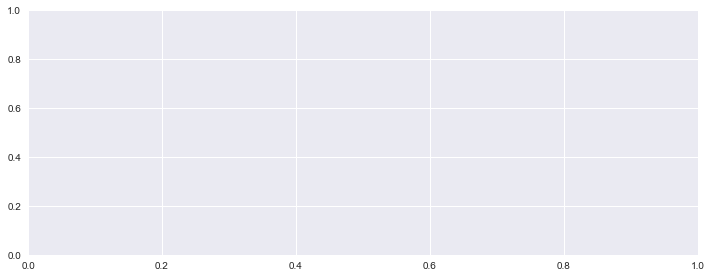

In [15]:
mean = data.fb_engagements.mean()
median = data.fb_engagements.median()

plt.figure(figsize=(12,4.5))
plt.hist(data.fb_engagements, bins=1)
#plt.axvline(mean, linestyle=':', label=f'Mean ({mean:,.0f})', color='green')
#plt.axvline(median, label=f'Median ({median:,.0f})', color='red')
leg = plt.legend()


Well that's not very useful. Almost everything will score less than 0 if we just do that, which isn't a useful metric.

Let's start by excluding zeros.

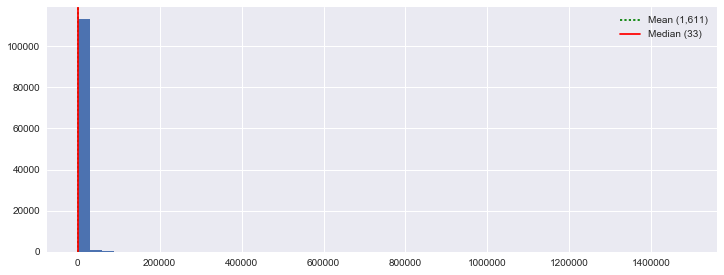

In [16]:
non_zero_fb_enagagements = data.fb_engagements[data.fb_engagements > 0]

plt.figure(figsize=(12,4.5))
plt.hist(non_zero_fb_enagagements, bins=50)
plt.axvline(mean, linestyle=':', label=f'Mean ({mean:,.0f})', color='green')
plt.axvline(median, label=f'Median ({median:,.0f})', color='red')
leg = plt.legend()

That's still a big number at the bottom, and so not a useful score.

Next, we exclude the outliers: cap at the 99.9th percentile (i.e. 65,258.53), so that 0.1% of articles should receive the maximum score.


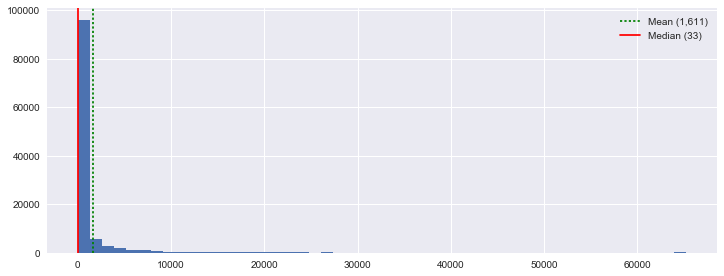

In [17]:
non_zero_fb_enagagements_without_outliers = non_zero_fb_enagagements.clip_upper(65258.53)

plt.figure(figsize=(12,4.5))
plt.hist(non_zero_fb_enagagements_without_outliers, bins=50)
plt.axvline(mean, linestyle=':', label=f'Mean ({mean:,.0f})', color='green')
plt.axvline(median, label=f'Median ({median:,.0f})', color='red')
leg = plt.legend()

That's a bit better, but still way too clustered at the low end. Let's look at a log normal distribution.

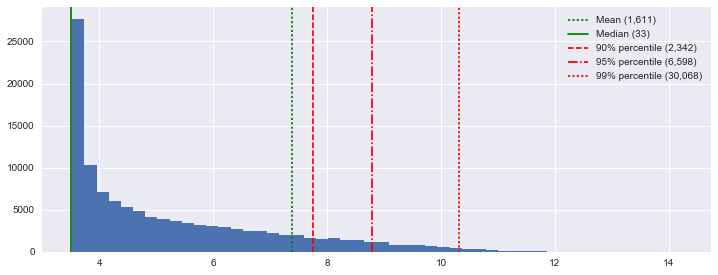

In [18]:
mean = data.fb_engagements.mean()
median = data.fb_engagements.median()
ninety = data.fb_engagements.quantile(.90)
ninetyfive = data.fb_engagements.quantile(.95)
ninetynine = data.fb_engagements.quantile(.99)

plt.figure(figsize=(12,4.5))
plt.hist(np.log(non_zero_fb_enagagements + median), bins=50)
plt.axvline(np.log(mean), linestyle=':', label=f'Mean ({mean:,.0f})', color='green')
plt.axvline(np.log(median), label=f'Median ({median:,.0f})', color='green')
plt.axvline(np.log(ninety), linestyle='--', label=f'90% percentile ({ninety:,.0f})', color='red')
plt.axvline(np.log(ninetyfive), linestyle='-.', label=f'95% percentile ({ninetyfive:,.0f})', color='red')
plt.axvline(np.log(ninetynine), linestyle=':', label=f'99% percentile ({ninetynine:,.0f})', color='red')
leg = plt.legend()


That's looking a bit more interesting.

After some exploration, to avoid too much emphasis on the lower end of the scale, we move the numbers to the right a bit by adding on the median.

In [19]:
log_engagements = (non_zero_fb_enagagements
                   .clip_upper(data.fb_engagements.quantile(.999))
                   .apply(lambda x: np.log(x + median))
                  )
log_engagements.describe()

count   114767.00
mean         5.28
std          1.81
min          3.53
25%          3.76
50%          4.63
75%          6.34
max         11.69
Name: fb_engagements, dtype: float64

Use standard feature scaling to bring that to a 1 to 50 range


In [20]:
def scale_log_engagements(engagements_logged):
    return np.ceil(
        50 * (engagements_logged - log_engagements.min()) / (log_engagements.max() - log_engagements.min())
    )

def scale_engagements(engagements):
    return scale_log_engagements(np.log(engagements + median))

scaled_non_zero_engagements = scale_log_engagements(log_engagements)
scaled_non_zero_engagements.describe()

count   114767.00
mean        11.18
std         11.11
min          0.00
25%          2.00
50%          7.00
75%         18.00
max         50.00
Name: fb_engagements, dtype: float64

In [21]:
# add in the zeros, as zero
scaled_engagements = pd.concat([scaled_non_zero_engagements, data.fb_engagements[data.fb_engagements == 0]])

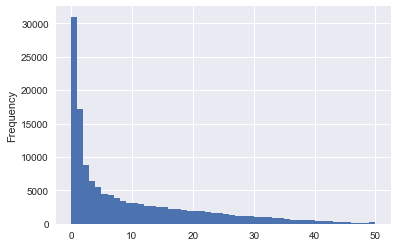

In [22]:
proposed = pd.DataFrame({"fb_engagements": data.fb_engagements, "response_score": scaled_engagements})
proposed.response_score.plot.hist(bins=50)

Now look at how the shares distribute to score:

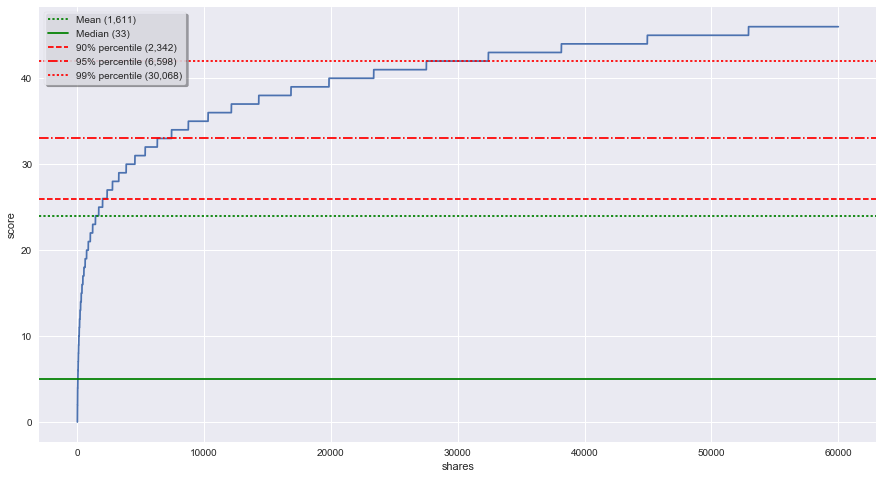

In [23]:
plt.figure(figsize=(15,8))

shares = np.arange(1, 60000)
plt.plot(shares, scale_engagements(shares))
plt.xlabel("shares")
plt.ylabel("score")
plt.axhline(scale_engagements(mean), linestyle=':', label=f'Mean ({mean:,.0f})', color='green')
plt.axhline(scale_engagements(median), label=f'Median ({median:,.0f})', color='green')
plt.axhline(scale_engagements(ninety), linestyle='--', label=f'90% percentile ({ninety:,.0f})', color='red')
plt.axhline(scale_engagements(ninetyfive), linestyle='-.', label=f'95% percentile ({ninetyfive:,.0f})', color='red')
plt.axhline(scale_engagements(ninetynine), linestyle=':', label=f'99% percentile ({ninetynine:,.0f})', color='red')

plt.legend(frameon=True, shadow=True)



In [24]:
proposed.groupby("response_score").fb_engagements.agg([np.size, np.min, np.max])

,size,amin,amax
response_score,,,
0.00,30990.00,0.00,1.00
1.00,17243.00,2.00,7.00
2.00,8865.00,8.00,14.00
3.00,6443.00,15.00,22.00
4.00,5552.00,23.00,32.00
5.00,4487.00,33.00,43.00
6.00,4236.00,44.00,57.00
7.00,3876.00,58.00,73.00
8.00,3484.00,74.00,92.00


Looks good to me, lets save that.

In [25]:
data["response_score"] = proposed.response_score

### Proposal

The maximum of 50 points is awarded when the engagements are greater than the 99.9th percentile, rolling over the last month. 

i.e. where $limit$ is the 99.5th percentile of engagements calculated over the previous month, the response score for article $a$ is:

\begin{align}
basicScore_a & = 
\begin{cases} 
   0 & \text{if } engagements_a = 0 \\
   \log(\min(engagements_a,limit) + median(engagements))      & \text{if } engagements_a > 0
\end{cases} \\
responseScore_a & = 
\begin{cases} 
   0 & \text{if } engagements_a = 0 \\
   50 \cdot \frac{basicScore_a - \min(basicScore)}{\max(basicScore) - \min(basicScore)}       & \text{if } engagements_a > 0
\end{cases} \\
\\
\text{The latter equation can be expanded to:} \\
responseScore_a & = 
\begin{cases} 
   0 & \text{if } engagements_a = 0 \\
   50 \cdot 
   \frac{\log(\min(engagements_a,limit) + median(engagements)) - \log(1 + median(engagements))}
   {\log(limit + median(engagements)) - \log(1 + median(engagements))}       & \text{if } engagements_a > 0
\end{cases} \\
\end{align}

# Promotion Score

The aim of the promotion score is to indicate how important the article was to the publisher, by tracking where they chose to promote it. This is a number between 0 and 50 comprised of:

- 20 points based on whether the article was promoted as the "lead" story on the publisher's home page
- 15 points based on how long the article was promoted anywhere on the publisher's home page
- 15 points based on whether the article was promoted on the publisher's main facebook brand page

The first two should be scaled by the popularity/reach of the home page, for which we use the alexa page rank as a proxy.

The last should be scaled by the popularity/reach of the brand page, for which we use the number of likes the brand page has.

### Lead story (20 points)

In [26]:
data.mins_as_lead.describe([0.5, 0.75, 0.9, 0.95, 0.99, 0.995, 0.999])

count   138245.00
mean         9.43
std         91.85
min          0.00
50%          0.00
75%          0.00
90%          0.00
95%          0.00
99%        280.00
99.5%      609.78
99.9%     1200.76
max       6989.00
Name: mins_as_lead, dtype: float64

As expected, the vast majority of articles don't make it as lead. Let's explore how long typically publishers put something as lead for.

In [27]:
lead_articles = data[data.mins_as_lead > 0]

In [28]:
lead_articles.mins_as_lead.describe([0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 0.995, 0.999])

count   4133.00
mean     315.39
std      430.96
min        4.00
25%       72.00
50%      169.00
75%      400.00
90%      784.00
95%     1061.00
99%     1644.00
99.5%   2144.40
99.9%   5161.23
max     6989.00
Name: mins_as_lead, dtype: float64

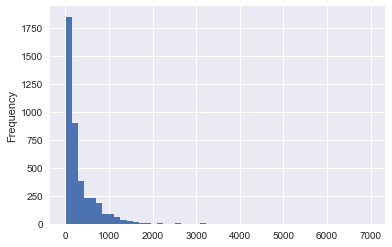

In [29]:
lead_articles.mins_as_lead.plot.hist(bins=50)

For lead, it's a  significant thing for an article to be lead at all, so although we want to penalise articles that were lead for a very short time, mostly we want to score the maximum even if it wasn't lead for ages. So we'll give maximum points when something has been lead for an hour.

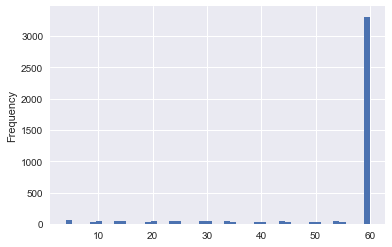

In [30]:
lead_articles.mins_as_lead.clip_upper(60).plot.hist(bins=50)

We also want to scale this by the alexa page rank, such that the maximum score of 20 points is for an article that was on the front for 4 hours for the most popular site.

So lets explore the alexa nunbers.

In [31]:
alexa_ranks = data.groupby(by="publisher_id").alexa_rank.mean().sort_values()
alexa_ranks

publisher_id
bbc_co_uk                               96
cnn_com                                105
nytimes_com                            120
theguardian_com                        142
buzzfeed_com                           147
dailymail_co_uk                        158
washingtonpost_com                     191
huffingtonpost_com                     215
foxnews_com                            285
rt_com                                 365
telegraph_co_uk                        370
independent_co_uk                      386
reuters_com                            497
npr_org                                594
mirror_co_uk                           706
nbcnews_com                            826
breitbart_com                          994
ft_com                                1596
economist_com                         1825
indy100_com                           5014
thetimes_co_uk                        6435
newstatesman_com                     12769
thecanary_co                         1568

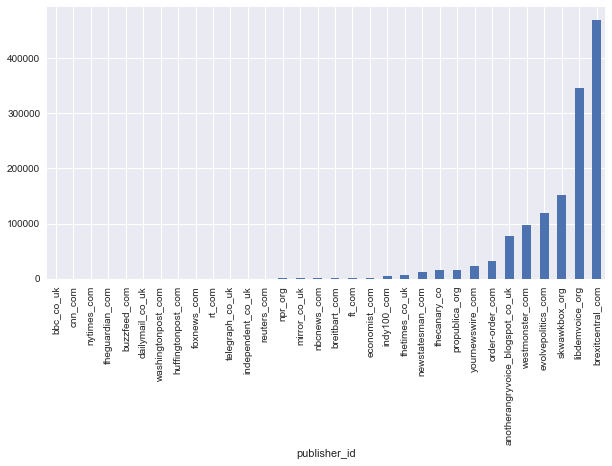

In [32]:
alexa_ranks.plot.bar(figsize=[10,5])

Let's try the simple option first: just divide the number of minutes as lead by the alexa rank. What's the scale of numbers we get then.

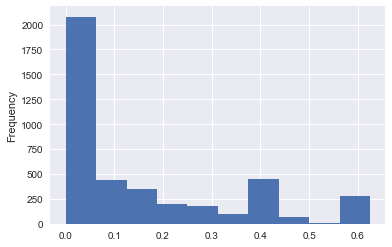

In [33]:
lead_proposal_1 = lead_articles.mins_as_lead.clip_upper(60) / lead_articles.alexa_rank
lead_proposal_1.plot.hist()

Looks like there's too much of a cluster around 0. Have we massively over penalised the publishers with a high alexa rank?

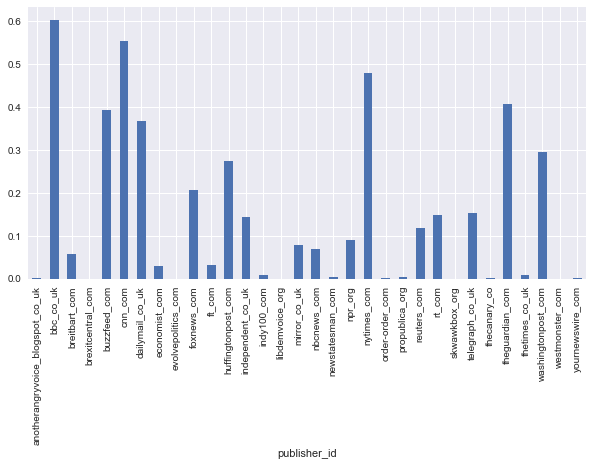

In [34]:
lead_proposal_1.groupby(data.publisher_id).mean().plot.bar(figsize=[10,5])

Yes. Let's try taking the log of the alexa rank and see if that looks better.

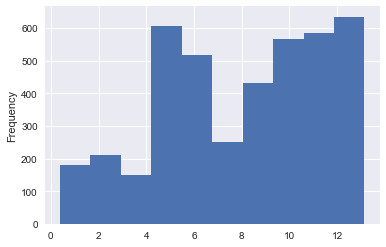

In [35]:
lead_proposal_2 = (lead_articles.mins_as_lead.clip_upper(60) / np.log(lead_articles.alexa_rank))
lead_proposal_2.plot.hist()

In [36]:
lead_proposal_2.groupby(data.publisher_id).describe()

,count,mean,std,min,25%,50%,75%,max
publisher_id,,,,,,,,
anotherangryvoice_blogspot_co_uk,34.00,5.20,0.70,1.24,5.33,5.33,5.33,5.33
bbc_co_uk,100.00,12.69,1.75,4.16,13.15,13.15,13.15,13.15
breitbart_com,184.00,8.35,1.28,1.45,8.69,8.69,8.69,8.69
brexitcentral_com,40.00,4.23,1.01,0.77,4.59,4.59,4.59,4.59
buzzfeed_com,204.00,11.60,1.46,3.81,12.02,12.02,12.02,12.02
cnn_com,206.00,12.52,1.48,2.15,12.89,12.89,12.89,12.89
dailymail_co_uk,162.00,11.48,1.54,0.79,11.85,11.85,11.85,11.85
economist_com,60.00,7.35,1.75,0.67,7.99,7.99,7.99,7.99
evolvepolitics_com,48.00,4.87,0.79,1.71,5.13,5.13,5.13,5.13


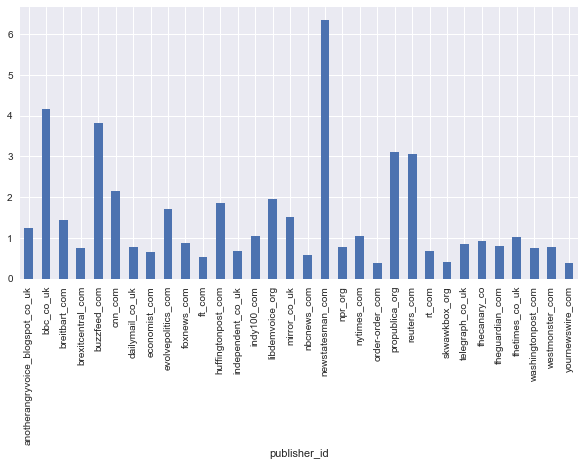

In [37]:
lead_proposal_2.groupby(data.publisher_id).min().plot.bar(figsize=[10,5])

That looks about right, as long as the smaller publishers were closer to zero. So let's apply feature scaling to this, to give a number between 1 and 20. (Anything not as lead will pass though as zero.)

In [38]:
def rescale(series):
    return (series - series.min()) / (series.max() - series.min())

lead_proposal_3 = np.ceil(20 * rescale(lead_proposal_2))

In [39]:
lead_proposal_2.min(), lead_proposal_2.max()

(0.38500569152790032, 13.145359968846892)

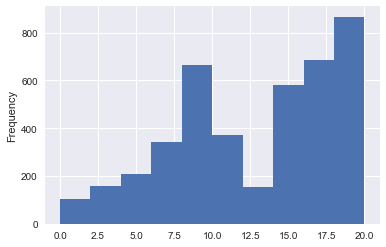

In [40]:
lead_proposal_3.plot.hist()

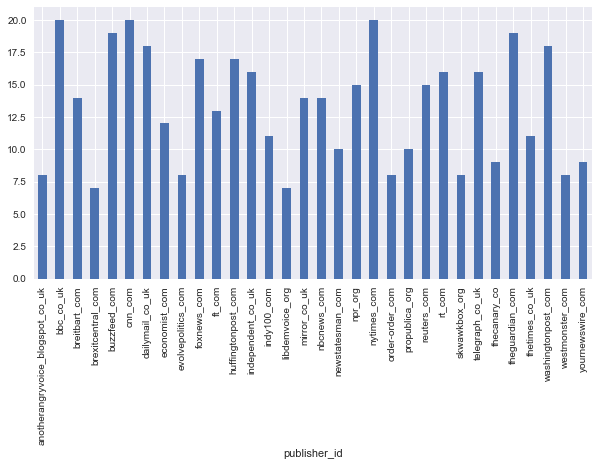

In [41]:
lead_proposal_3.groupby(data.publisher_id).median().plot.bar(figsize=[10,5])

In [42]:
data["lead_score"] = pd.concat([lead_proposal_3, data.mins_as_lead[data.mins_as_lead==0]])

In [43]:
data.lead_score.value_counts().sort_index()

0.00     134118
1.00         97
2.00         76
3.00         81
4.00        130
5.00         80
6.00         70
7.00        271
8.00        336
9.00        328
10.00       189
11.00       183
12.00        69
13.00        85
14.00       347
15.00       233
16.00       333
17.00       352
18.00       232
19.00       291
20.00       344
Name: lead_score, dtype: int64

In [44]:
data.lead_score.groupby(data.publisher_id).max()

publisher_id
anotherangryvoice_blogspot_co_uk    8.00
bbc_co_uk                          20.00
breitbart_com                      14.00
brexitcentral_com                   7.00
buzzfeed_com                       19.00
cnn_com                            20.00
dailymail_co_uk                    18.00
economist_com                      12.00
evolvepolitics_com                  8.00
foxnews_com                        17.00
ft_com                             13.00
huffingtonpost_com                 17.00
independent_co_uk                  16.00
indy100_com                        11.00
libdemvoice_org                     7.00
mirror_co_uk                       14.00
nbcnews_com                        14.00
newstatesman_com                   10.00
npr_org                            15.00
nytimes_com                        20.00
order-order_com                     9.00
propublica_org                     10.00
reuters_com                        15.00
rt_com                             16.00
skw

In summary then, score for article $a$ is:


$$
unscaledLeadScore_a = \frac{\min(minsAsLead_a, 60)}{\log(alexaRank_a)}\\
leadScore_a = 19 \cdot 
\frac{unscaledLeadScore_a - \min(unscaledLeadScore)}
{\max(unscaledLeadScore) - \min(unscaledLeadScore)} 
+ 1
$$

Since the minium value of $minsAsLead$ is 1, $\min(unscaledLeadScore)$ is pretty insignificant. So we can simplify this to:

$$
leadScore_a = 20 \cdot 
\frac{unscaledLeadScore_a }
     {\max(unscaledLeadScore)} 
$$

or: 

$$
leadScore_a = 20 \cdot 
\frac{\frac{\min(minsAsLead_a, 60)}{\log(alexaRank_a)} }
     {\frac{60}{\log(\max(alexaRank))}} 
$$

$$
leadScore_a = \left( 20 \cdot 
\frac{\min(minsAsLead_a, 60)}{\log(alexaRank_a)} \cdot
     {\frac{\log(\max(alexaRank))}{60}} \right)
$$

## Time on front score (15 points)

This is similar to time as lead, so lets try doing the same calculation, except we also want to factor in the number of slots on the front:


$$frontScore_a = 
15 
\left(\frac{\min(minsOnFront_a, 1440)}{alexaRank_a \cdot numArticlesOnFront_a}\right) 
\left( \frac{\min(alexaRank \cdot numArticlesOnFront)}{1440} \right)$$

In [45]:
(data.alexa_rank * data.num_articles_on_front).min() / 1440

1.1666666666666667

In [46]:
time_on_front_proposal_1 = np.ceil(data.mins_on_front.clip_upper(1440) / (data.alexa_rank * data.num_articles_on_front) * (2.45) * 15)

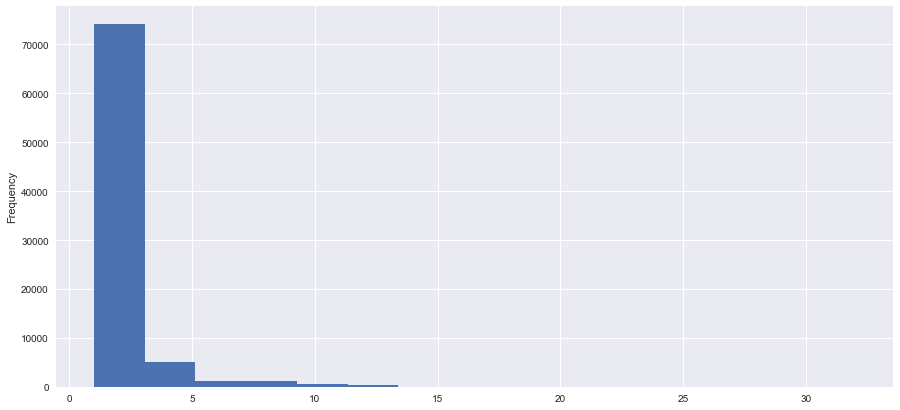

In [47]:
time_on_front_proposal_1.plot.hist(figsize=(15, 7), bins=15)

In [48]:
time_on_front_proposal_1.value_counts().sort_index()

1.00     60540
2.00      8026
3.00      5541
4.00      3980
5.00      1009
6.00       690
7.00       558
8.00       564
9.00       698
10.00      297
11.00      286
12.00      296
13.00       99
14.00       40
15.00       17
32.00        2
dtype: int64

In [49]:
time_on_front_proposal_1.groupby(data.publisher_id).sum()

publisher_id
anotherangryvoice_blogspot_co_uk      81.00
bbc_co_uk                          15276.00
breitbart_com                       2485.00
brexitcentral_com                     51.00
buzzfeed_com                        9500.00
cnn_com                            12161.00
dailymail_co_uk                    13313.00
economist_com                        390.00
evolvepolitics_com                    70.00
foxnews_com                         8882.00
ft_com                              3148.00
huffingtonpost_com                  8190.00
independent_co_uk                   4312.00
indy100_com                          616.00
libdemvoice_org                      176.00
mirror_co_uk                        2241.00
nbcnews_com                         2071.00
newstatesman_com                     155.00
npr_org                             2341.00
nytimes_com                         9668.00
order-order_com                      330.00
propublica_org                        35.00
reuters_com        

That looks good to me.

In [50]:
data["front_score"] = np.ceil(data.mins_on_front.clip_upper(1440) / (data.alexa_rank * data.num_articles_on_front) * (2.45) * 15).fillna(0)

In [51]:
data.front_score 

id
7dff0d3d3e8ae6a4f43d582b294bd03c0a4746f3    1.00
663d3c01e00503ac647c38e5d3d775cafe7e2ca0    1.00
8bb899dbd63148a4a173882bbbc940492737d0b7    1.00
e8184c4ea8498103945968fcacd5c3c00f883cba    0.00
0d8ec825a1f491a0c526859f608ba9b15c7a8ba2    2.00
3aafd4740f1f17e6fc95ff150f69cb59558e59d8    4.00
6a841b83a0dd644aa6ea78ffbd54f58b1a66a7b6    6.00
96d72401aedbc06d4bb5cca6362d4ec8ed793355    1.00
56aa931d7c654815b53f4b043c87c0ac0861e021    0.00
3e5be0e746d28dfc32e30fe2effee69d5961c37f    0.00
80d87401d456b2ee62023bbe3743aa5ba364f247    0.00
b18912c86234a70ba7610776efa576d2aa2e0177    1.00
e9070ef52ee653532ad3a97bd0b0706f7d1df144    0.00
82e7c8ddc8464e4d52f86c486b16a8d101dc9a7d    0.00
f8a7d027d95b478702139fff1ee0e5833b66a8bb    1.00
11cb1da2c791987aadfacd179add5f2673f3291e    2.00
94f2f78412c11739c4fca490d24a104edcac33df   11.00
d354f70d22c17d66af3b7771dd87eb5799925ffc    2.00
aeb28ab277ead52d186829ae058a00df46648172    1.00
536ccbab72a7c359e098e3f6feb9b070f2b73339    1.00
0a9bb1e943a406a23

## Facebook brand page promotion (15 points)

One way a publisher has of promoting content is to post to their brand page. The significance of doing so is stronger when the brand page has more followers (likes).

$$ facebookPromotionProposed1_a = 15 \left( \frac {brandPageLikes_a} {\max(brandPageLikes)} \right) $$

Now lets explore the data to see if that makes sense. **tr;dr the formula above is incorrect**

In [52]:
data.fb_brand_page_likes.max()

42647872.0

In [53]:
facebook_promotion_proposed_1 = np.ceil((15 * (data.fb_brand_page_likes / data.fb_brand_page_likes.max())).fillna(0))

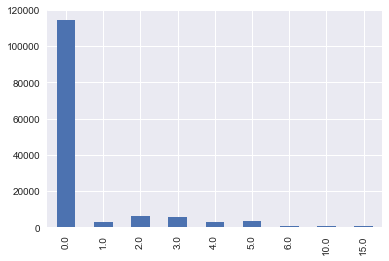

In [54]:
facebook_promotion_proposed_1.value_counts().sort_index().plot.bar()

In [55]:
facebook_promotion_proposed_1.groupby(data.publisher_id).describe()

,count,mean,std,min,25%,50%,75%,max
publisher_id,,,,,,,,
anotherangryvoice_blogspot_co_uk,81.00,0.44,0.50,0.00,0.00,0.00,1.00,1.00
bbc_co_uk,12832.00,0.65,3.05,0.00,0.00,0.00,0.00,15.00
breitbart_com,2579.00,0.81,0.98,0.00,0.00,0.00,2.00,2.00
brexitcentral_com,51.00,0.90,0.30,0.00,1.00,1.00,1.00,1.00
buzzfeed_com,2187.00,0.23,0.42,0.00,0.00,0.00,0.00,1.00
cnn_com,4063.00,2.51,4.33,0.00,0.00,0.00,10.00,10.00
dailymail_co_uk,24069.00,0.53,1.51,0.00,0.00,0.00,0.00,5.00
economist_com,718.00,1.79,1.47,0.00,0.00,3.00,3.00,3.00
evolvepolitics_com,72.00,0.97,0.17,0.00,1.00,1.00,1.00,1.00


That's too much variation: sites like the Guardian, which have a respectable 7.5m likes, should not be scoring a 3. Lets try applying a log to it, and then standard feature scaling again.

In [56]:
data.fb_brand_page_likes.groupby(data.publisher_id).max()

publisher_id
anotherangryvoice_blogspot_co_uk     328420.00
bbc_co_uk                          42647872.00
breitbart_com                       3487964.00
brexitcentral_com                      7866.00
buzzfeed_com                        2591775.00
cnn_com                            27763464.00
dailymail_co_uk                    11651715.00
economist_com                       8154368.00
evolvepolitics_com                   107007.00
foxnews_com                        15503059.00
ft_com                              3584700.00
huffingtonpost_com                  9593243.00
independent_co_uk                   7132250.00
indy100_com                          209247.00
libdemvoice_org                        8518.00
mirror_co_uk                        2740528.00
nbcnews_com                         9049400.00
newstatesman_com                     153519.00
npr_org                             6060772.00
nytimes_com                        14186079.00
order-order_com                       43213.00


In [57]:
np.log(2149)

7.6727578966425103

In [58]:
np.log(data.fb_brand_page_likes.groupby(data.publisher_id).max())

publisher_id
anotherangryvoice_blogspot_co_uk   12.70
bbc_co_uk                          17.57
breitbart_com                      15.06
brexitcentral_com                   8.97
buzzfeed_com                       14.77
cnn_com                            17.14
dailymail_co_uk                    16.27
economist_com                      15.91
evolvepolitics_com                 11.58
foxnews_com                        16.56
ft_com                             15.09
huffingtonpost_com                 16.08
independent_co_uk                  15.78
indy100_com                        12.25
libdemvoice_org                     9.05
mirror_co_uk                       14.82
nbcnews_com                        16.02
newstatesman_com                   11.94
npr_org                            15.62
nytimes_com                        16.47
order-order_com                    10.67
propublica_org                     12.72
reuters_com                        15.14
rt_com                             15.32
skw

That's more like it, but the lower numbers should be smaller.

In [59]:
np.log(data.fb_brand_page_likes.groupby(data.publisher_id).max() / 1000)

publisher_id
anotherangryvoice_blogspot_co_uk    5.79
bbc_co_uk                          10.66
breitbart_com                       8.16
brexitcentral_com                   2.06
buzzfeed_com                        7.86
cnn_com                            10.23
dailymail_co_uk                     9.36
economist_com                       9.01
evolvepolitics_com                  4.67
foxnews_com                         9.65
ft_com                              8.18
huffingtonpost_com                  9.17
independent_co_uk                   8.87
indy100_com                         5.34
libdemvoice_org                     2.14
mirror_co_uk                        7.92
nbcnews_com                         9.11
newstatesman_com                    5.03
npr_org                             8.71
nytimes_com                         9.56
order-order_com                     3.77
propublica_org                      5.82
reuters_com                         8.24
rt_com                              8.41
skw

In [60]:
scaled_fb_brand_page_likes = (data.fb_brand_page_likes / 1000)
facebook_promotion_proposed_2 = np.ceil(\
    (15 * \
     (np.log(scaled_fb_brand_page_likes) / np.log(scaled_fb_brand_page_likes.max()))\
    )\
                                       ).fillna(0)

In [61]:
facebook_promotion_proposed_2.groupby(data.publisher_id).max()

publisher_id
anotherangryvoice_blogspot_co_uk    9.00
bbc_co_uk                          15.00
breitbart_com                      12.00
brexitcentral_com                   3.00
buzzfeed_com                       12.00
cnn_com                            15.00
dailymail_co_uk                    14.00
economist_com                      13.00
evolvepolitics_com                  7.00
foxnews_com                        14.00
ft_com                             12.00
huffingtonpost_com                 13.00
independent_co_uk                  13.00
indy100_com                         8.00
libdemvoice_org                     4.00
mirror_co_uk                       12.00
nbcnews_com                        13.00
newstatesman_com                    8.00
npr_org                            13.00
nytimes_com                        14.00
order-order_com                     6.00
propublica_org                      9.00
reuters_com                        12.00
rt_com                             12.00
skw

LGTM. So the equation is


$$ facebookPromotion_a = 15 \left( 
\frac {\log(\frac {brandPageLikes_a}{1000})} 
{\log(\frac {\max(brandPageLikes)}{1000}))} \right) $$


Now, let's try applying standard feature scaling approch to this, rather than using a magic number of 1,000. That equation would be:

\begin{align}
unscaledFacebookPromotion_a &= 
   \log(brandPageLikes_a) \\
facebookPromotion_a &= 
   15 \cdot \frac{unscaledFacebookPromotion_a - \min(unscaledFacebookPromotion)}{\max(unscaledFacebookPromotion) - \min(unscaledFacebookPromotion)}  \\
\\
\text{The scaling can be simplified to:} \\
facebookPromotion_a &= 
   15 \cdot \frac{unscaledFacebookPromotion_a - \log(\min(brandPageLikes))}{\log(\max(brandPageLikes)) - \log(\min(brandPageLikes))}  \\
\\
\text{Meaning the overall equation becomes:} \\
facebookPromotion_a &= 
   15 \cdot \frac{\log(brandPageLikes_a) - \log(\min(brandPageLikes))}{\log(\max(brandPageLikes)) - \log(\min(brandPageLikes))} 
   \end{align}


In [62]:
facebook_promotion_proposed_3 = np.ceil(
    (14 * 
     ( 
         (np.log(data.fb_brand_page_likes) - np.log(data.fb_brand_page_likes.min()) ) /
         (np.log(data.fb_brand_page_likes.max()) - np.log(data.fb_brand_page_likes.min()))
     )
    ) + 1
                                       )

In [63]:
facebook_promotion_proposed_3.groupby(data.publisher_id).max()

publisher_id
anotherangryvoice_blogspot_co_uk    9.00
bbc_co_uk                          15.00
breitbart_com                      12.00
brexitcentral_com                   3.00
buzzfeed_com                       12.00
cnn_com                            15.00
dailymail_co_uk                    14.00
economist_com                      13.00
evolvepolitics_com                  7.00
foxnews_com                        14.00
ft_com                             12.00
huffingtonpost_com                 13.00
independent_co_uk                  13.00
indy100_com                         8.00
libdemvoice_org                     3.00
mirror_co_uk                       12.00
nbcnews_com                        13.00
newstatesman_com                    7.00
npr_org                            13.00
nytimes_com                        14.00
order-order_com                     6.00
propublica_org                      9.00
reuters_com                        12.00
rt_com                             12.00
skw

In [64]:
data["facebook_promotion_score"] = facebook_promotion_proposed_3.fillna(0.0)

# Review

In [65]:
data["promotion_score"] = (data.lead_score + data.front_score + data.facebook_promotion_score)
data["attention_index"] = (data.promotion_score + data.response_score)

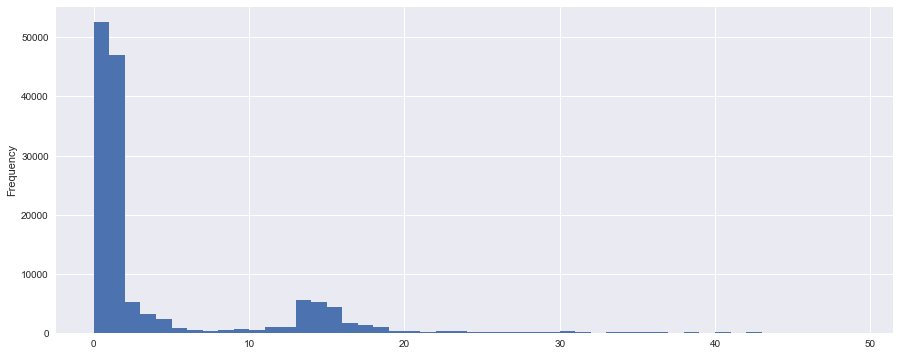

In [66]:
data.promotion_score.plot.hist(bins=np.arange(50), figsize=(15,6))

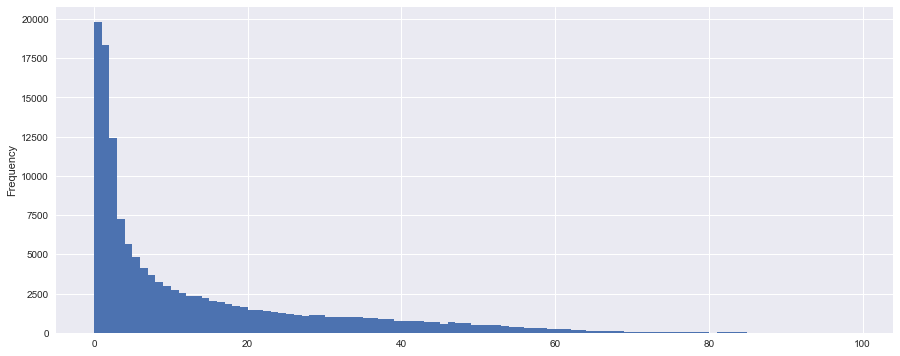

In [67]:
data.attention_index.plot.hist(bins=np.arange(100), figsize=(15,6))

In [68]:
data.attention_index.value_counts().sort_index()

0.00     19800
1.00     18359
2.00     12406
3.00      7252
4.00      5659
5.00      4814
6.00      4111
7.00      3704
8.00      3257
9.00      2964
10.00     2698
11.00     2548
12.00     2324
13.00     2352
14.00     2250
15.00     2039
16.00     1942
17.00     1853
18.00     1703
19.00     1651
20.00     1467
21.00     1480
22.00     1371
23.00     1314
24.00     1240
25.00     1224
26.00     1143
27.00     1102
28.00     1141
29.00     1115
         ...  
65.00      133
66.00      117
67.00       99
68.00       86
69.00       76
70.00       72
71.00       50
72.00       42
73.00       52
74.00       40
75.00       35
76.00       31
77.00       36
78.00       28
79.00       27
80.00       17
81.00       22
82.00       24
83.00       21
84.00       22
85.00       13
86.00       10
87.00        8
88.00        9
89.00        6
91.00        2
92.00        2
93.00        4
94.00        6
95.00        1
Name: attention_index, Length: 95, dtype: int64

In [69]:
# and lets see the articles with the biggest attention index
data.sort_values("attention_index", ascending=False)

,url,headline,discovered,published,fb_engagements,fb_max_engagements_per_min,fb_max_engagements_per_min_time,fb_comments,fb_reactions,fb_shares,...,fb_brand_page,fb_brand_page_likes,fb_brand_page_time,alexa_rank,response_score,lead_score,front_score,facebook_promotion_score,promotion_score,attention_index
id,,,,,,,,,,,,,,,,,,,,,
3f66918e16e7430d7aa13244df084a801f52d862,http://www.bbc.co.uk/news/uk-england-london-40...,Vehicle hits pedestrians in Finsbury Park,2017-06-19 00:21:00.909,2017-06-19 00:17:28,268459.00,575.75,2017-06-19T06:23:59.871Z,62981.00,156410.00,49068.00,...,True,42352036.00,2017-06-19T05:20:41.000Z,96,50.00,20.00,10.00,15.00,45.00,95.00
ba671a1169cb7269431511acfa3d2468e3ab3d31,http://www.bbc.co.uk/news/uk-england-london-40...,'Serious fire' in west London tower block,2017-06-14 01:45:01.257,2017-06-14 01:43:03,534172.00,1356.58,2017-06-14T07:12:00.581Z,108074.00,344028.00,82070.00,...,True,42229337.00,2017-06-14T06:56:51.000Z,96,50.00,20.00,9.00,15.00,44.00,94.00
ec12fc2f7d45a68e7e361d4ad3fd654d56696e4a,http://money.cnn.com/2017/06/23/media/white-ho...,"With cameras banned, CNN sends sketch artist t...",2017-06-23 19:50:05.637,2017-06-23 19:20:57,138222.00,327.33,2017-06-23T21:16:02.827Z,20559.00,103899.00,13764.00,...,True,27691050.00,2017-06-23T20:02:55.000Z,105,50.00,20.00,9.00,15.00,44.00,94.00
13b55256066011820af20d76a366269878b61dd4,http://www.cnn.com/2017/06/17/politics/cuba-tr...,Havana: US in no 'condition to lecture us' on ...,2017-06-17 19:39:16.930,2017-06-17 19:35:58,143341.00,330.46,2017-06-19T00:44:00.558Z,13720.00,113386.00,16235.00,...,True,27664004.00,2017-06-19T00:00:01.000Z,105,50.00,20.00,9.00,15.00,44.00,94.00
45e93af5a94cb7315465aeab9e10921a223fa7fe,http://www.cnn.com/2017/06/16/us/michelle-cart...,Texting suicide trial: Decision coming Friday,2017-06-16 13:27:19.059,2017-06-16 13:23:18,222388.00,573.30,2017-06-16T15:56:02.213Z,50970.00,152144.00,19274.00,...,True,27650967.00,2017-06-16T15:22:39.000Z,105,50.00,20.00,9.00,15.00,44.00,94.00
9416d045643bdea7777098092253ecd807f5d0bd,http://www.cnn.com/2017/06/17/us/missing-sailo...,Missing Fitzgerald sailors found in flooded co...,2017-06-18 02:18:16.117,2017-06-18 02:14:27,169181.00,525.58,2017-06-18T04:08:00.547Z,18523.00,135716.00,14942.00,...,True,27659675.00,2017-06-18T03:49:56.000Z,105,50.00,20.00,9.00,15.00,44.00,94.00
72e0b54da34d718d5078cd585f632e2e343c230f,http://money.cnn.com/2017/06/29/media/mika-brz...,"Trump tweets shocking assault on Brzezinski, S...",2017-06-29 14:10:09.750,2017-06-29 13:57:41,147817.00,342.17,2017-06-29T15:36:00.984Z,59702.00,76199.00,11916.00,...,True,27726444.00,2017-06-29T14:10:00.000Z,105,50.00,20.00,9.00,15.00,44.00,94.00
c5f69004e317f04fdbddd42f053d584f2a7a937a,http://www.bbc.co.uk/news/uk-politics-40403434,Conservatives agree pact with DUP to support M...,2017-06-26 10:12:03.300,2017-06-26 10:11:07,60778.00,1319.08,2017-06-26T13:02:01.797Z,23885.00,29181.00,7712.00,...,True,42500083.00,2017-06-26T10:20:46.000Z,96,46.00,20.00,12.00,15.00,47.00,93.00
f2fc4fed26fb2c85439c4a522ca7b912fb45a7ac,http://www.cnn.com/2017/06/14/politics/alexand...,Rep. Scalise shot in Virginia,2017-06-14 12:12:16.440,2017-06-14 12:06:24,100739.00,344.48,2017-06-14T13:14:01.184Z,45271.00,42509.00,12959.00,...,True,27635745.00,2017-06-14T12:10:29.000Z,105,49.00,20.00,9.00,15.00,44.00,93.00


In [70]:
data["score_diff"] = data.promotion_score - data.response_score

In [71]:
# promoted but low response
data.sort_values("score_diff", ascending=False).head(25)

,url,headline,discovered,published,fb_engagements,fb_max_engagements_per_min,fb_max_engagements_per_min_time,fb_comments,fb_reactions,fb_shares,...,fb_brand_page_likes,fb_brand_page_time,alexa_rank,response_score,lead_score,front_score,facebook_promotion_score,promotion_score,attention_index,score_diff
id,,,,,,,,,,,,,,,,,,,,,
7a429951e59186566f7dd6b638b05506c5176a93,http://www.bbc.co.uk/news/live/election-2017-4...,Election Live,2017-06-06 11:06:01.620,2017-06-06 11:03:23,0.00,0.00,2017-06-07T11:53:59.853Z,0.00,0.00,0.00,...,42103917.00,2017-06-09T01:49:34.000Z,96,0.00,20.00,11.00,15.00,46.00,46.00,46.00
84f5fd4a5be0159b455ecc099b2fcd0e42e267f5,https://www.buzzfeed.com/nidhisubbaraman/insid...,Inside A Controversial Clinic That Teaches Peo...,2017-06-28 09:10:13.503,2017-06-26 14:57:44,2.00,0.00,2017-06-28T09:24:03.146Z,0.00,0.00,2.00,...,2584728.00,2017-06-29T06:04:00.000Z,147,1.00,19.00,13.00,12.00,44.00,45.00,43.00
cd584979a93abc337cda37bbdf01912caa0381d9,https://www.buzzfeed.com/claudiarosenbaum/bill...,Bill Cosby's Rape Trial Is About To Start And ...,2017-06-03 14:33:16.882,2017-06-01 01:03:34,1.00,0.08,2017-06-03T14:46:00.622Z,0.00,0.00,1.00,...,2536263.00,2017-06-03T21:00:00.000Z,147,0.00,19.00,12.00,11.00,42.00,42.00,42.00
0e3250b88c58ded0ebc4ab2d90e0b541a7903cf8,https://www.buzzfeed.com/buzzfeednews/live-upd...,Live Updates: Britain Heads To The Polls,2017-06-08 08:09:17.133,2017-06-07 15:47:54,1.00,0.02,2017-06-08T09:24:00.945Z,0.00,0.00,1.00,...,2548289.00,2017-06-09T10:09:32.000Z,147,0.00,19.00,12.00,11.00,42.00,42.00,42.00
d27cc0ade64ffced5b2b1e29b71080e9f0de3d84,https://www.buzzfeed.com/tomwarren/secrets-of-...,The Death Of The Spy In The Bag Is Linked To R...,2017-06-20 16:57:12.742,2017-06-15 15:33:12,6.00,0.50,2017-06-20T17:10:02.173Z,0.00,1.00,5.00,...,2561814.00,2017-06-20T17:44:00.000Z,147,1.00,19.00,12.00,11.00,42.00,43.00,41.00
dd585ff206f769b8310cc36c58d05374dc1a379c,https://www.buzzfeed.com/janebradley/scientist...,Scientist Who Helped Connect Litvinenko's Murd...,2017-06-19 17:18:20.157,2017-06-11 14:28:46,10.00,0.83,2017-06-19T17:32:01.728Z,0.00,1.00,9.00,...,2561137.00,2017-06-19T18:24:00.000Z,147,2.00,19.00,12.00,11.00,42.00,44.00,40.00
54b1489aa247c088391589971ac55fd576fd932e,https://www.buzzfeed.com/alysonmartin/workers-...,Workers Are Being Fired For Using Medical Cann...,2017-06-10 14:03:20.115,2017-06-07 19:09:24,6.00,0.50,2017-06-10T14:16:00.647Z,0.00,1.00,5.00,...,2552235.00,2017-06-10T14:37:00.000Z,147,1.00,19.00,11.00,11.00,41.00,42.00,40.00
08e81c12ae1d5ed846572488c04cb48a4aed3120,http://www.huffingtonpost.com/entry/jason-chaf...,"As Jason Chaffetz Retires From Congress, Here ...",2017-07-01 13:15:15.581,2017-06-29 13:47:08,6.00,0.50,2017-07-01T13:28:03.393Z,0.00,0.00,6.00,...,9588082.00,2017-07-01T15:00:48.000Z,215,1.00,17.00,10.00,13.00,40.00,41.00,39.00
c5426af122810f4643a4e6acc45f225f7625492c,http://www.huffingtonpost.com/entry/covered-ca...,Trump Says Obamacare Is 'Imploding.' That's Ne...,2017-06-10 12:15:14.571,2017-06-06 07:51:32,5.00,0.42,2017-06-10T12:28:00.860Z,0.00,0.00,5.00,...,9525206.00,2017-06-10T17:30:21.000Z,215,1.00,17.00,10.00,13.00,40.00,41.00,39.00


In [72]:
# high response but not promoted
data.sort_values("score_diff", ascending=True).head(25)

,url,headline,discovered,published,fb_engagements,fb_max_engagements_per_min,fb_max_engagements_per_min_time,fb_comments,fb_reactions,fb_shares,...,fb_brand_page_likes,fb_brand_page_time,alexa_rank,response_score,lead_score,front_score,facebook_promotion_score,promotion_score,attention_index,score_diff
id,,,,,,,,,,,,,,,,,,,,,
4c7609641edd2e0a574b3fb536f482e609adc5ec,https://www.buzzfeed.com/guillermodelpalacio/i...,31 imágenes para no olvidar que los españoles ...,2017-06-20 09:27:16.715,2017-06-20 09:26:43,116818.00,43.58,2017-06-22T21:30:03.836Z,8026.00,80705.00,28087.00,...,nan,NaN,147,50.00,0.00,0.00,0.00,0.00,50.00,-50.00
7ba7462db1e44e49212622cab8413b06428a0950,https://www.buzzfeed.com/rafaelcabrera/15-imag...,15 Imágenes impactantes de la tormenta que cay...,2017-06-29 01:48:11.878,2017-06-29 01:22:04,167255.00,850.90,2017-06-29T21:06:02.588Z,22752.00,111032.00,33471.00,...,nan,NaN,147,50.00,0.00,0.00,0.00,0.00,50.00,-50.00
c54f9b5c9d2757ea2b06346eec627b84ac1e78f4,http://www.huffingtonpost.com/entry/worlds-top...,World’s Top Religious Leaders Issue Rare Joint...,2017-06-15 20:57:19.154,2017-06-15 09:17:18,448813.00,158.47,2017-06-16T13:30:02.716Z,22045.00,353405.00,73363.00,...,nan,NaN,215,50.00,0.00,0.00,0.00,0.00,50.00,-50.00
84227db2d31a582373ad12c7b15657a51fd388f7,https://www.buzzfeed.com/alexandrearagao/ladra...,Homem que filmou tatuagem na testa de adolesce...,2017-06-12 20:57:21.242,2017-06-12 20:56:33,184604.00,8801.75,2017-06-14T00:42:01.983Z,28753.00,139238.00,16613.00,...,nan,NaN,147,50.00,0.00,0.00,0.00,0.00,50.00,-50.00
962f960b36f46cbf3191a21031db3e063f8900e1,https://www.nytimes.com/2017/06/24/science/at-...,"At Nursing Homes, Medicaid Cuts Would Reach Ev...",2017-06-24 14:48:00.291,2017-06-24 14:46:11,108327.00,73.94,2017-06-24T21:26:00.754Z,20984.00,61227.00,26116.00,...,nan,NaN,120,50.00,0.00,0.00,0.00,0.00,50.00,-50.00
429160ad3031aa2c79f8b3c3a22cc476b92be955,https://www.washingtonpost.com/news/post-polit...,"D.C., Md. attorneys general to sue Trump, sayi...",2017-06-12 03:09:04.484,2017-06-12 03:01:52,207836.00,10811.33,2017-06-12T23:47:59.456Z,17336.00,162530.00,27970.00,...,nan,NaN,191,50.00,0.00,1.00,0.00,1.00,51.00,-49.00
9c8cd0a3c834a77649f7f50716faf517c0cb5770,https://www.indy100.com/article/grenfell-tower...,The Queen managed to make it to Grenfell Tower...,2017-06-16 11:40:11.906,2017-06-16 11:31:50,325211.00,321.17,2017-06-16T17:56:00.155Z,27130.00,260540.00,37541.00,...,nan,NaN,5014,50.00,0.00,1.00,0.00,1.00,51.00,-49.00
97720f7c41e93d719725f3a0153c27dfc6a780fb,https://www.buzzfeed.com/robstott/for-the-firs...,"For The First Time, A Baby Has Been Breastfed ...",2017-06-22 03:30:16.690,2017-06-22 03:23:52,86520.00,34.21,2017-06-23T20:36:01.692Z,9146.00,71637.00,5737.00,...,nan,NaN,147,49.00,0.00,0.00,0.00,0.00,49.00,-49.00
448e59719a590ffdd6303da7f7d2a5b694ee6f57,http://yournewswire.com/women-dna-man-sex/,Women Absorb And Retain DNA From Every Man The...,2017-06-23 18:20:21.452,2017-06-23 16:49:46,704855.00,196.44,2017-06-26T18:02:01.121Z,330366.00,287725.00,86764.00,...,nan,NaN,22568,50.00,0.00,1.00,0.00,1.00,51.00,-49.00


Write that data to a file. Note that the scores here are provisional for two reasons:
1. they should be using a rolling-month based on the article publication date to calculate medians/min/max etc, whereas in this workbook we as just using values for the month of May
2. for analysis, we've rounded the numbers; we don't expect to do that for the actual scores

In [73]:
data.to_csv("articles_with_provisional_scores_2017-06-01_2017-06-30.csv")

# Summary

The attention index of an article is comprised of four components:

- *lead score* (max 20 points) based on how long an article was the lead story on the publisher's home page, scaled by the traffic to that publisher
- *front score* (max 15 points) based on how long an article was present on the publisher's home page, scaled by traffic to that publisher
- *Facebook promotion score* (max 15 points) based on whether the article was promoted to the publisher's Facebook brand page, scaled by the reach of that brand page
- *response score* (max 50 points) based on the number of Facebook engagements the article received, relative to other articles

Or, in other words:

\begin{align}
attentionIndex_a &= leadScore_a + frontScore_a + facebookPromotionScore_a + responseScore_a \\
leadScore_a &= 20 \cdot \left(\frac{\min(minsAsLead_a, 60)}{alexaRank_a}\right) \cdot \left( \frac{\min(alexaRank)}{60} \right) \\
frontScore_a &= 
15 \cdot
\left(\frac{\min(minsOnFront_a, 1440)}{alexaRank_a \cdot numArticlesOnFront_a}\right) \cdot
\left( \frac{\min(alexaRank \cdot numArticlesOnFront)}{1440} \right) \\
facebookPromotion_a &= 
\begin{cases}
 0 \text{ if not shared on brand page }\\
   15 \cdot \frac{\log(brandPageLikes_a) - \log(\min(brandPageLikes))}{\log(\max(brandPageLikes)) - \log(\min(brandPageLikes))}  \text{ otherwise }
\end{cases}   
\\
responseScore_a &= 
\begin{cases} 
   0 \text{ if } engagements_a = 0 \\
   50 \cdot 
   \frac{\log(\min(engagements_a,limit) + median(engagements)) - \log(1 + median(engagements))}
   {\log(limit + median(engagements)) - \log(1 + median(engagements))} \text{ if } engagements_a > 0
\end{cases} \\
\end{align} 